In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
read_file = pd.read_csv('study_pruned_features.csv', index_col=False)

df = pd.DataFrame(read_file)

# I will replace the BDI values with a 0 or 1.
# 0 corresponds to scores less than 14; 1 corresponds to the rest.
df['bdi_total'] = np.where(df['bdi_total'].between(0, 13.0, inclusive=True), 0.0, df['bdi_total'])
df['bdi_total'] = np.where(df['bdi_total'] > 13.0, 1.0, df['bdi_total'])

df.head()

In [3]:
df.loc[:,'bdi_total'].value_counts()

0.0    98
1.0    26
Name: bdi_total, dtype: int64

In [ ]:
# x-values are the genes; y-values are the BDI scores.
X = df.loc[:, 'KLRB1':'ST6GALNAC6']
y = df.loc[:,'bdi_total']

# This normalizes the data, hopefully.
X = (X - X.mean()) / X.std()

X.head()

In [5]:
# This will evenly split the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [6]:
y_train.value_counts()

0.0    60
1.0    14
Name: bdi_total, dtype: int64

In [7]:
y_val.value_counts()

0.0    19
1.0     6
Name: bdi_total, dtype: int64

In [8]:
y_test.value_counts()

0.0    19
1.0     6
Name: bdi_total, dtype: int64

In [9]:
C_values = [0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035,
            0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075,
            0.08, 0.085, 0.09, 0.095, 0.1]

for value in C_values:
    clf = svm.SVC(C=value, kernel='linear', probability=True, class_weight={1:50})
    clf.fit(X_train, y_train)

    y_val_pred = clf.predict(X_val)
    
    prec_val = metrics.precision_score(y_val, y_val_pred)
    print("Precision with C = " + str(value) + ": " +
          str(prec_val))
    
    rec_val = metrics.recall_score(y_val, y_val_pred)
    print("Recall with C = " + str(value) + ": " +
          str(rec_val))
    
    F1 = 2 * (prec_val * rec_val) / (prec_val + rec_val)
    print("F1 with C = " + str(value) + ": " +
          str(F1) + "\n")

Precision with C = 0.005: 0.26666666666666666
Recall with C = 0.005: 0.6666666666666666
F1 with C = 0.005: 0.3809523809523809

Precision with C = 0.01: 0.08333333333333333
Recall with C = 0.01: 0.16666666666666666
F1 with C = 0.01: 0.1111111111111111

Precision with C = 0.015: 0.09090909090909091
Recall with C = 0.015: 0.16666666666666666
F1 with C = 0.015: 0.11764705882352942

Precision with C = 0.02: 0.1111111111111111
Recall with C = 0.02: 0.16666666666666666
F1 with C = 0.02: 0.13333333333333333

Precision with C = 0.025: 0.0
Recall with C = 0.025: 0.0
F1 with C = 0.025: nan

Precision with C = 0.03: 0.0
Recall with C = 0.03: 0.0
F1 with C = 0.03: nan

Precision with C = 0.035: 0.0
Recall with C = 0.035: 0.0
F1 with C = 0.035: nan

Precision with C = 0.04: 0.0
Recall with C = 0.04: 0.0
F1 with C = 0.04: nan

Precision with C = 0.045: 0.0
Recall with C = 0.045: 0.0
F1 with C = 0.045: nan

Precision with C = 0.05: 0.0
Recall with C = 0.05: 0.0
F1 with C = 0.05: nan

Precision with C 

<ipython-input-9-2db75eb961f1>:19: RuntimeWarning: invalid value encountered in double_scalars
  F1 = 2 * (prec_val * rec_val) / (prec_val + rec_val)
<ipython-input-9-2db75eb961f1>:19: RuntimeWarning: invalid value encountered in double_scalars
  F1 = 2 * (prec_val * rec_val) / (prec_val + rec_val)
<ipython-input-9-2db75eb961f1>:19: RuntimeWarning: invalid value encountered in double_scalars
  F1 = 2 * (prec_val * rec_val) / (prec_val + rec_val)
<ipython-input-9-2db75eb961f1>:19: RuntimeWarning: invalid value encountered in double_scalars
  F1 = 2 * (prec_val * rec_val) / (prec_val + rec_val)
<ipython-input-9-2db75eb961f1>:19: RuntimeWarning: invalid value encountered in double_scalars
  F1 = 2 * (prec_val * rec_val) / (prec_val + rec_val)
<ipython-input-9-2db75eb961f1>:19: RuntimeWarning: invalid value encountered in double_scalars
  F1 = 2 * (prec_val * rec_val) / (prec_val + rec_val)
<ipython-input-9-2db75eb961f1>:19: RuntimeWarning: invalid value encountered in double_scalars
  F1 

In [10]:
# A C-value of 0.005 seems to give the best precision and recall, so I'll use that.
clf = svm.SVC(C=0.005, kernel='linear', probability=True, class_weight={1:50})
clf.fit(X_train, y_train)

y_val_pred = clf.predict(X_val)

print(y_val_pred)
print(y_val)
    
prec_val = metrics.precision_score(y_val, y_val_pred)
print("Precision with C = " + str(0.005) + ": " +
      str(prec_val))
    
rec_val = metrics.recall_score(y_val, y_val_pred)
print("Recall with C = " + str(0.005) + ": " +
      str(rec_val))

F1 = 2 * (prec_val * rec_val) / (prec_val + rec_val)
print("F1 with C = " + str(0.005) + ": " +
      str(F1))

[0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1.
 1.]
5      0.0
25     0.0
34     0.0
101    0.0
84     0.0
38     0.0
4      0.0
20     1.0
1      1.0
79     0.0
118    0.0
116    0.0
47     1.0
11     1.0
22     0.0
23     0.0
60     0.0
21     0.0
76     0.0
44     0.0
69     1.0
97     0.0
0      1.0
92     0.0
123    0.0
Name: bdi_total, dtype: float64
Precision with C = 0.005: 0.26666666666666666
Recall with C = 0.005: 0.6666666666666666
F1 with C = 0.005: 0.3809523809523809


In [11]:
clf = svm.SVC(C=0.005, kernel='linear', probability=True, class_weight={1:50})
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)

prec_val = metrics.precision_score(y_test, y_test_pred)
print("Precision with C = " + str(0.005) + ": " +
      str(prec_val))
    
rec_val = metrics.recall_score(y_test, y_test_pred)
print("Recall with C = " + str(0.005) + ": " +
      str(rec_val))

F1 = 2 * (prec_val * rec_val) / (prec_val + rec_val)
print("F1 with C = " + str(0.005) + ": " +
      str(F1))

Precision with C = 0.005: 0.29411764705882354
Recall with C = 0.005: 0.8333333333333334
F1 with C = 0.005: 0.4347826086956522


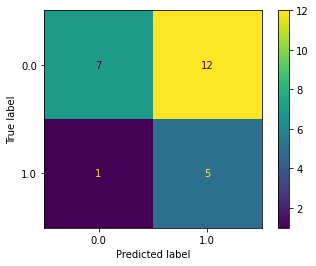

In [29]:
confusion = metrics.confusion_matrix(y_test, y_test_pred, labels=clf.classes_)

display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=clf.classes_)

display.plot()

0.6403508771929824


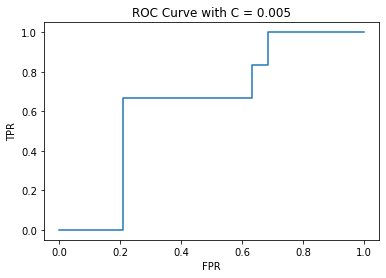

In [22]:
prob = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, prob)
roc_auc = metrics.auc(fpr, tpr)

auc = metrics.roc_auc_score(y_test, prob)
print(auc)

fig, ax = plt.subplots()

ax.plot(fpr, tpr)

ax.set_title("ROC Curve with C = 0.005")
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')

plt.savefig("SVM_ROC.png")

plt.show()